#### [인공지능: 한글 인식 과제 2 - 임베디드시스템공학과 202201658 박소윤]

**주요 전체 흐름 요약**
1. 한글 흑백 이미지 제작
2. 각 글자에 따른 원핫인코딩 실행
3. 순전파 및 역전파 수행
4. 최적의 가중치 파일 전처리
5. 평가 

**주의: 인코딩의 문제로 경로가 복잡해서 주의점을 잘 살펴봐주세요!**

- "C:/Users/asx12/OneDrive/바탕 화면/인공지능" 
=> 글자이미지, 학습 결과( 에포크마다 각 레이어의 출력값, 목표값, 오차 결과, 훈련 정확도와 테스트 정확도),  최적의 가중치가 저장된 파일

- "C:/AI/"
 => 평가할 데이터의 라벨링 파일 (EUC-KR), 평가 내용의 상세 정보, 평가 예측 결과

 **주의: 주요 코드가 아닌 코드는 맨 아래에 첨부하였습니다.**


##### 1. 한글 흑백 이미지 제작 
이 코드는 폰트에 대해 픽셀 값이 고정된 이미지를 제작하는 코드입니다. 주로 평가용으로 사용합니다.


[참고 코드]
- 한글 정리 구현 코드 
- 픽셀 이동 이미지 구현 코드 - 학습용으로 사용



자세한 내용은 과제 2 보고서를 참고 바랍니다.       

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont

# 한글 글자 리스트
korean_chars = ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']

# 64x64 이미지 크기와 폰트 경로 설정
image_size = (64, 64)
font_size = 60  # 고정된 폰트 크기 설정
font_path = r"C:\Windows\Fonts\H2HDRM.TTF"  # 한글 폰트 경로

# 이미지 저장 폴더
base_dir =  r"C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN"
os.makedirs(base_dir, exist_ok=True)

# 각 한글 글자에 대해 64x64 1비트 흑백 BMP 이미지 생성
for char in korean_chars:
    # 글자에 해당하는 폴더 생성
    char_dir = os.path.join(base_dir, char)
    os.makedirs(char_dir, exist_ok=True)

    # 흰색 배경(1비트에서는 True)으로 초기화
    image = Image.new("1", image_size, 1)
    draw = ImageDraw.Draw(image)

    try:
        # 폰트 설정
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print("한글 폰트를 찾을 수 없습니다. 폰트 경로를 확인해 주세요.")
        continue

    # 텍스트의 크기를 계산하여 이미지 중앙에 배치
    bbox = draw.textbbox((0, 0), char, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    # 기본 중앙 위치 설정
    text_position = (
        (image_size[0] - text_width) // 2,
        (image_size[1] - text_height) // 2
    )

    # 글자 그리기 (1비트 이미지는 fill 값이 0 또는 1이어야 함)
    draw.text(text_position, char, font=font, fill=0)

    # 이미지 저장
    filename = f"{char}_{font_size}.bmp"
    image_path = os.path.join(char_dir, filename)
    image.save(image_path, format="BMP")
    print(f"{filename} 파일이 {char_dir}에 생성되었습니다.")


충_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\충에 생성되었습니다.
청_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\청에 생성되었습니다.
남_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\남에 생성되었습니다.
도_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\도에 생성되었습니다.
홍_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\홍에 생성되었습니다.
성_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\성에 생성되었습니다.
군_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\군에 생성되었습니다.
읍_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\읍에 생성되었습니다.
기_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\기에 생성되었습니다.
길_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\길에 생성되었습니다.
숙_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\숙에 생성되었습니다.
사_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\사에 생성되었습니다.
호_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\호에 생성되었습니다.
동_60.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN\동에 생성되었습니다.
박_60.b

##### 2. 각 글자에 따른 원핫인코딩 실행

In [ ]:
import csv
import os

# 중복되지 않는 한글 글자 리스트
unique_chars = ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']  # 예시, 총 155개 글자로 확장 가능
num_chars = len(unique_chars)

# 원핫 인코딩 라벨 생성 함수
def get_one_hot_vector(index, size):
    vector = [0] * size
    vector[index] = 1
    return vector

# CSV 파일에 이미지 경로와 원핫 인코딩 라벨 저장
csv_filename = "dataset_labels_IN.csv"
base_folder =  r"C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_IN"

with open(csv_filename, mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    
    # 헤더 작성 (이미지 경로 + 각 글자에 대한 컬럼)
    header = ["image_path"] + unique_chars
    writer.writerow(header)
    
    # 각 글자 폴더 내 이미지 파일 경로와 원핫 인코딩 라벨 작성
    for i, char in enumerate(unique_chars):
        one_hot_vector = get_one_hot_vector(i, num_chars)
        char_folder = os.path.join(base_folder, char)
        
        # 해당 글자 폴더 내 모든 bmp 파일 탐색
        if os.path.exists(char_folder):
            for img_file in os.listdir(char_folder):
                if img_file.endswith(".bmp"):
                    image_path = os.path.join(char_folder, img_file)
                    writer.writerow([image_path] + one_hot_vector)
        else:
            print(f"{char_folder} 폴더가 존재하지 않습니다.")

print(f"{csv_filename} 파일이 생성되었습니다.")

dataset_labels_IN.csv 파일이 생성되었습니다.


##### 3. 순전파 및 역전파 수행

In [ ]:
import os
import csv
import random
import time
import numpy as np
import threading

batch_info = {"current_batch": 0, "current_epoch": 0, "batch_size": 0, "total_batches": 0}


# 활성화 함수 (Sigmoid, ReLU, Tanh, Softmax 추가)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.power(x, 2)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) 
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)


# 가중치 초기화 함수 (Xavier, He 초기화 추가)
def initialize_weights(rows, cols, method='xavier', seed=None):
    if seed is not None:
        np.random.seed(seed)

    if method == 'xavier':
        limit = np.sqrt(6 / (rows + cols))
        return np.random.uniform(-limit, limit, (rows, cols))
    elif method == 'he':
        limit = np.sqrt(2 / rows)
        return np.random.uniform(-limit, limit, (rows, cols))
    else:
        return np.random.uniform(-1, 1, (rows, cols))


# BMP 이미지 파일 읽기 함수
def read_bmp_image_1bit(file_path, input_size):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"파일을 찾을 수 없습니다: {file_path}")

    with open(file_path, "rb") as f:
        f.seek(54)  # BMP 헤더 건너뛰기
        pixel_data = f.read()

    pixels = []
    for byte in pixel_data:
        for i in range(8):
            pixels.append((byte >> (7 - i)) & 1)

    if len(pixels) > input_size:
        pixels = pixels[:input_size]
    elif len(pixels) < input_size:
        raise ValueError("이미지 크기가 입력 데이터 크기보다 작습니다.")

    return np.array(pixels, dtype=np.float32).reshape(-1, 1)


# 데이터셋 로드 함수
def load_dataset(base_path, csv_file, input_size):
    image_files, labels = [], []

    with open(csv_file, newline="", encoding="utf-8") as f:
        reader = csv.reader(f)
        next(reader)

        for row in reader:
            try:
                file_path = os.path.join(base_path, row[0].strip())
                image = read_bmp_image_1bit(file_path, input_size)
                label = np.array([float(v) for v in row[1:]], dtype=np.float32).reshape(-1, 1)
                image_files.append(image)
                labels.append(label)
            except ValueError as e:
                print(f"잘못된 라벨 형식 발견: {row}. 에러: {e}")
                continue
            except FileNotFoundError as e:
                print(e)
                continue

    if not image_files or not labels:
        raise ValueError("데이터셋 로드에 실패했습니다. 이미지 파일이나 라벨이 없습니다.")

    return image_files, labels


# 순전파 함수 (수정됨: 출력층 활성화 함수 추가)
def forward_propagation(input_data, weights, activation_function, output_activation_function):
    activations = [input_data]

    for i in range(len(weights)):
        z = np.dot(weights[i], activations[-1])
        if i == len(weights) - 1:  # 수정됨: 출력층의 활성화 함수 적용
            if output_activation_function == 'sigmoid':
                a = sigmoid(z)
            elif output_activation_function == 'softmax':
                a = softmax(z)
        else:
            if activation_function == 'sigmoid':
                a = sigmoid(z)
            elif activation_function == 'relu':
                a = relu(z)
            elif activation_function == 'tanh':
                a = tanh(z)
        activations.append(a)

    return activations


# 역전파 함수
def backpropagation(weights, activations, target, learning_rate, activation_function):
    output = activations[-1]
    output_error = target - output
    mse = np.mean(np.square(output_error))

    if activation_function == 'sigmoid':
        output_delta = output_error * sigmoid_derivative(output)
    elif activation_function == 'relu':
        output_delta = output_error * relu_derivative(output)
    elif activation_function == 'tanh':
        output_delta = output_error * tanh_derivative(output)

    deltas = [output_delta]
    for i in range(len(weights) - 1, 0, -1):
        layer_error = np.dot(weights[i].T, deltas[-1])
        if activation_function == 'sigmoid':
            layer_delta = layer_error * sigmoid_derivative(activations[i])
        elif activation_function == 'relu':
            layer_delta = layer_error * relu_derivative(activations[i])
        elif activation_function == 'tanh':
            layer_delta = layer_error * tanh_derivative(activations[i])
        deltas.append(layer_delta)

    deltas.reverse()

    for i in range(len(weights)):
        weights[i] += learning_rate * np.dot(deltas[i], activations[i].T)

    return output_error, mse


# 정확도 계산 함수
def calculate_accuracy(weights, inputs, targets, activation_function, output_activation_function):
    if len(targets) == 0:
        return 0

    correct_predictions = 0
    for input_data, target in zip(inputs, targets):
        activations = forward_propagation(input_data, weights, activation_function, output_activation_function)
        output = activations[-1]
        predicted = (output > 0.5).astype(int) if output_activation_function == 'sigmoid' else np.argmax(output, axis=0)
        target_class = target if output_activation_function == 'sigmoid' else np.argmax(target, axis=0)
        if np.array_equal(predicted, target_class):
            correct_predictions += 1
    return correct_predictions / len(targets) * 100


# 사용자 입력을 감지하는 함수 (스레드로 실행)
def listen_for_keypress(start_time):
    while True:
        input_key = input()
        if input_key:
            elapsed_time = time.time() - start_time
            remaining_batches = (batch_info["total_batches"] - batch_info["current_batch"] // batch_info["batch_size"])
            print(f"경과 시간: {elapsed_time:.2f}초")
            print(f"현재 에포크: {batch_info['current_epoch']} / 현재 배치: {batch_info['current_batch']} / 남은 배치: {remaining_batches}")
            print(f"훈련 정확도: {float(batch_info.get('train_accuracy', 0.0)):.6f}% / 테스트 정확도: {float(batch_info.get('test_accuracy', 0.0)):.6f}%")
            print(f"현재 MSE: {float(batch_info.get('mse', 0.0)):.6f}")

# 메인 실행 함수
def main():
    start_time = time.time()

    threading.Thread(target=listen_for_keypress, args=(start_time,), daemon=True).start()  # 사용자 입력 감지 스레드 시작
    
    last_log_time = start_time  # 마지막 로그 시간 초기화

    input_size = 64 * 64
    base_path = "C:/Users/asx12/OneDrive/바탕 화면/인공지능"
    csv_file = "dataset_labels_image.csv"
    batch_size = 64
    learning_rate = 0.001
    epochs = 200
    activation_function = 'relu'  # 활성화 함수 선택 ('sigmoid', 'relu', 'tanh' 중 선택)
    output_activation_function = 'softmax'  # 출력층 활성화 함수 설정 ('sigmoid', 'softmax' 중 선택) - 수정됨
    weight_init_method = 'he'  # 가중치 초기화 방법 선택 ('xavier', 'he' 중 선택)

    results_folder = "C:/Users/asx12/OneDrive/바탕 화면/인공지능/all_training_results_IN"
    os.makedirs(results_folder, exist_ok=True)

    try:
        inputs, targets = load_dataset(base_path, csv_file, input_size)
    except ValueError as e:
        print(e)
        return

    # 데이터셋을 무작위로 섞음
    combined = list(zip(inputs, targets))
    random.shuffle(combined)
    inputs, targets = zip(*combined)

    train_size = int(0.8 * len(inputs))
    train_inputs, train_targets = inputs[:train_size], targets[:train_size]
    test_inputs, test_targets = inputs[train_size:], targets[train_size:]

    output_size = len(train_targets[0])  # 출력 노드 수를 레이블의 길이로 설정
    layer_structure = [input_size, 512, 256, 126, output_size]  # 마지막 레이어 노드 수를 출력 크기로 설정
    weights = [initialize_weights(layer_structure[i + 1], layer_structure[i], method=weight_init_method, seed=42) for i in range(len(layer_structure) - 1)]

    # 배치 크기 및 전체 배치 수 정보 저장
    batch_info["batch_size"] = batch_size
    batch_info["total_batches"] = len(train_inputs) // batch_size

    try:
        best_mse = float('inf')  # 초기 최적의 MSE 설정
        best_weights = []
        for epoch in range(epochs):
            batch_info["current_epoch"] = epoch + 1

            # 각 에포크마다 데이터셋 무작위로 섞기 
            combined = list(zip(train_inputs, train_targets))
            random.shuffle(combined)
            train_inputs, train_targets = zip(*combined)

            # 각 에포크마다 결과 저장 폴더 생성
            epoch_folder = os.path.join(results_folder, f"epoch_{epoch + 1}")
            os.makedirs(epoch_folder, exist_ok=True)

            for batch_start in range(0, len(train_inputs), batch_size):
                batch_info["current_batch"] = batch_start

                batch_inputs = train_inputs[batch_start:batch_start + batch_size]
                batch_targets = train_targets[batch_start:batch_start + batch_size]

                for input_data, target in zip(batch_inputs, batch_targets):
                    activations = forward_propagation(input_data, weights, activation_function, output_activation_function)  
                    output_error, mse = backpropagation(weights, activations, target, learning_rate, activation_function)

                if mse < best_mse:
                    best_mse = mse
                    best_weights = [layer.copy() for layer in weights]

            train_accuracy = calculate_accuracy(weights, train_inputs, train_targets, activation_function, output_activation_function)
            test_accuracy = calculate_accuracy(weights, test_inputs, test_targets, activation_function, output_activation_function)
            
            with open(os.path.join(epoch_folder, f"epoch_{epoch + 1}_results.txt"), "w", encoding="utf-8") as f:
                f.write(f"에포크 {epoch + 1} 결과\n")
                f.write(f"====================\n")
                f.write(f"훈련 정확도: {train_accuracy:.6f}%\n")
                f.write(f"테스트 정확도: {test_accuracy:.6f}%\n")
                
            # 에포크마다 각 레이어의 출력값, 목표값, 오차 저장
            with open(os.path.join(epoch_folder, f"epoch_{epoch + 1}_details.txt"), "a", encoding="utf-8") as f:               
                f.write(f"\n--- MSE (Mean Squared Error) ---\n")
                f.write(f"{round(best_mse, 4)}\n")
                
                f.write(f"Target: {target.flatten()}\n")
                f.write(f"\n--- Output Error ---\n")
                f.write(f"{[round(e, 4) for e in output_error.flatten()]}\n")
                f.write(f"Input Data: {input_data.flatten()}\n")

                for layer_index, activation in enumerate(activations):
                    f.write(f"\n--- Layer {layer_index + 1} Activation ---\n")
                    f.write(f"{[round(a[0], 4) for a in activation]}\n")
                
                f.write(f"\n--- Updated Weights ---\n")
                for layer_index, layer_weights in enumerate(best_weights):
                    f.write(f"\n--- Layer {layer_index + 1} Weights ---\n")
                    for weight_row in layer_weights:
                        f.write(f"{[round(w, 4) for w in weight_row]}\n")

            # 1시간마다 학습 상태 출력
            current_time = time.time()
            if current_time - last_log_time >= 3600:
                elapsed_time = current_time - start_time
                print(f"학습 중입니다. 경과 시간: {elapsed_time:.2f}초")
                print(f"현재 에포크: {batch_info['current_epoch']} / 현재 배치: {batch_info['current_batch']}")
                print(f"훈련 정확도: {train_accuracy:.6f}% / 테스트 정확도: {test_accuracy:.6f}%")
                print(f"현재 MSE: {mse:.6f}")
                last_log_time = current_time

    except KeyboardInterrupt:
        print("\n학습이 중단되었습니다!")

    finally:
        end_time = time.time()  # 종료 시간 기록
        elapsed_time = end_time - start_time
        print(f"경과 시간: {elapsed_time:.2f}초")

if __name__ == "__main__":
    main()


경과 시간: 11.27초
현재 에포크: 1 / 현재 배치: 384 / 남은 배치: 85
훈련 정확도: 0.000000% / 테스트 정확도: 0.000000%
현재 MSE: 0.000000
경과 시간: 14.60초
현재 에포크: 1 / 현재 배치: 640 / 남은 배치: 81
훈련 정확도: 0.000000% / 테스트 정확도: 0.000000%
현재 MSE: 0.000000


##### 4. 최적의 가중치 파일 전처리

In [8]:
import re

weights_file = "C:/Users/asx12/OneDrive/바탕 화면/인공지능/all_training_results_plz_size/epoch_20/epoch_20_details.txt"
output_file = "C:/AI/processed_weights_with_labels.txt"

def process_weights_file(weights_file, output_file):
    with open(weights_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    updated_weights_start = False
    current_layer = None
    processed_weights = []

    for line in lines:
        line = line.strip()
        
        if '--- Updated Weights ---' in line:
            updated_weights_start = True
            continue

        if updated_weights_start:
            # 레이어 정보 추출
            layer_match = re.match(r'--- Layer (\d+) Weights ---', line)
            if layer_match:
                current_layer = int(layer_match.group(1))
                processed_weights.append(f'Layer {current_layer} Weights:')
                continue

            # 가중치 값이 있는 줄인 경우
            if line.startswith('[np.float64('):
                # [np.float64(...), ...] 형식을 float 값으로 변환
                weights = re.findall(r'np\.float64\(([-\d\.e]+)\)', line)
                float_weights = [float(w) for w in weights]
                processed_weights.append(' '.join(map(str, float_weights)))

    # 결과를 output 파일에 저장
    with open(output_file, 'w', encoding='utf-8') as f:
        for line in processed_weights:
            f.write(line + '\n')

# 가중치 파일 처리
process_weights_file(weights_file, output_file)

##### 5. 평가 

In [6]:
import os
import csv
import numpy as np
import time
from PIL import Image

# 원핫 인코딩한 순서에 따른 글자 리스트
characters_list = ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']

# 가중치 파일에서 가중치 읽기 함수
def load_updated_weights(weights_file):
    weights = []
    with open(weights_file, 'r') as f:
        lines = f.readlines()
        layer_weights = []
        recording = False
        with open("C:/Users/asx12/OneDrive/바탕 화면/인공지능/loaded_weights_output.txt", 'w', encoding="utf-8") as log_file:
            for line in lines:
                if line.startswith('Layer') and 'Weights' in line:
                    # 새로운 레이어가 시작될 때 이전 레이어 가중치를 저장
                    if layer_weights:
                        weights.append(np.array(layer_weights, dtype=float))
                        for weight_row in layer_weights:
                            log_file.write(' '.join(map(str, weight_row)) + '\n')
                        layer_weights = []
                    recording = True
                elif recording:
                    # 가중치 값을 읽어와서 float 리스트로 변환 후 저장
                    layer_weights.append([float(w) for w in line.strip().split()])
            
            # 마지막 레이어의 가중치 추가
            if layer_weights:
                weights.append(np.array(layer_weights, dtype=float))
                for weight_row in layer_weights:
                    log_file.write(' '.join(map(str, weight_row)) + '\n')

    return weights

# 학습 중 최종 저장된 가중치(best_weights)와 저장된 가중치 비교 함수
def compare_weights(loaded_weights, trained_weights):
    if len(loaded_weights) != len(trained_weights):
        print("레이어 개수가 다릅니다.")
        return False

    for i in range(len(loaded_weights)):
        if not np.allclose(loaded_weights[i], trained_weights[i], atol=1e-5):
            print(f"레이어 {i + 1}의 가중치가 다릅니다.")
            return False
    print("가중치가 모두 일치합니다.")
    return True

# 가중치 파일에서 읽은 내용을 별도의 파일로 저장하는 함수
def save_loaded_weights(weights, output_file):
    with open(output_file, 'w', encoding="utf-8") as f:
        for i, layer_weights in enumerate(weights):
            f.write(f'Layer {i + 1} Weights:\n')
            for weight_row in layer_weights:
                f.write(' '.join(map(str, weight_row)) + '\n')
            f.write('\n')

# BMP 이미지 파일 읽기 함수
def read_bmp_image_1bit(file_path, input_size):
    with open(file_path, "rb") as f:
        f.seek(54)
        pixel_data = f.read()
    
    pixels = []
    for byte in pixel_data:
        for i in range(8):
            pixels.append((byte >> (7 - i)) & 1)
    
    if len(pixels) > input_size:
        pixels = pixels[:input_size]
    elif len(pixels) < input_size:
        raise ValueError("이미지 크기가 입력 데이터 크기보다 작습니다.")

    return np.array(pixels, dtype=np.float32).reshape(-1, 1)

# 데이터셋 로드 함수
def load_dataset(base_path, csv_file):
    dataset = {}
    with open(csv_file, newline="", encoding="euc-kr") as f:
        reader = csv.reader(f)
        next(reader)  # Skip the header if present
        for row in reader:
            image_path = row[0]
            label = [int(v) for v in row[1:]]
            dataset[image_path] = label
    return dataset

# 순전파 함수
def forward_propagation(input_data, weights, activation_function, output_activation_function):
    activations = [input_data]

    for i in range(len(weights)):
        z = np.dot(weights[i], activations[-1])
        if i == len(weights) - 1:  # Output layer activation
            if output_activation_function == 'sigmoid':
                a = 1 / (1 + np.exp(-z))
            elif output_activation_function == 'softmax':
                exp_z = np.exp(z - np.max(z))  # Overflow 방지를 위해 z에서 최대값을 빼줌
                a = exp_z / np.sum(exp_z, axis=0, keepdims=True)
        else:
            if activation_function == 'sigmoid':
                a = 1 / (1 + np.exp(-z))
            elif activation_function == 'relu':
                a = np.maximum(0, z)
            elif activation_function == 'tanh':
                a = np.tanh(z)
        activations.append(a)

    return activations

# 모델 평가 함수
def evaluate_model(weights_file, base_path, csv_file, input_size, output_log_file, prediction_log_file, activation_function='relu', output_activation_function='softmax'):
    # 가중치 읽기
    weights = load_updated_weights(weights_file)

    # 데이터셋 로드 및 전체 데이터 평가
    dataset = load_dataset(base_path, csv_file)
    total_samples = len(dataset)
    correct_predictions = 0

    with open(output_log_file, 'w', encoding="utf-8") as label_log, open(prediction_log_file, 'w', encoding="utf-8") as prediction_log:
        for sample, target in dataset.items():
            # 입력 데이터 및 타겟 가져오기
            input_data = read_bmp_image_1bit(os.path.join(base_path, sample), input_size)
            
            # 순전파 수행
            activations = forward_propagation(input_data, weights, activation_function, output_activation_function)
            output = activations[-1]
            
            # 예측값 및 실제 라벨 비교
            predicted = np.argmax(output, axis=0)
            target_class = np.argmax(target)

            character_name = os.path.basename(os.path.dirname(sample))
            predicted_character = characters_list[predicted[0]]  # 원핫인코딩 순서에 따라 예측 라벨 적용

            # 예측 벡터에서 가장 높은 값과 그 위치 찾기
            max_value = np.max(output)
            max_index = np.argmax(output)

            # 상위 4개의 출력값과 그 위치 찾기
            top_4_indices = np.argsort(output.flatten())[-4:][::-1]
            top_4_values = output.flatten()[top_4_indices]

            # 라벨 비교 정보 저장
            label_log.write(f"이미지 경로: {sample}\n")
            label_log.write(f"실제 라벨: {character_name}, 목표 인덱스: {target_class}\n")
            label_log.write(f"예측 라벨: {predicted_character}, 예측 인덱스: {predicted[0]}\n")
            label_log.write(f"타겟 벡터: {target}\n")
            label_log.write(f"예측 벡터: {output.flatten()}\n")
            label_log.write(f"예측 벡터의 최대값: {max_value}, 위치: {max_index}\n")
            label_log.write(f"상위 4개의 예측값: {top_4_values}, 위치: {top_4_indices}\n")
            label_log.write("====================\n")

            if predicted_character == character_name:
                prediction_log.write(f"실제: {character_name}, 예측: {predicted_character} - 예측이 맞았습니다.\n")
                correct_predictions += 1
            else:
                prediction_log.write(f"실제: {character_name}, 예측: {predicted_character} - 예측이 틀렸습니다.\n")

    # 평가 정확도 출력
    accuracy = correct_predictions / total_samples * 100
    print(f"\n평가 정확도: {accuracy:.6f}%")

# 메인 함수
def main():
    weights_file = "C:/Users/asx12/OneDrive/바탕 화면/인공지능/all_training_results_plz_size/processed_weights_with_labels.txt"
    base_path = "C:/Users/asx12/OneDrive/바탕 화면/인공지능"
    csv_file = "C:/AI/dataset_labels_noise.csv"
    input_size = 64 * 64
    output_log_file = "C:/AI/label_comparison_output_all.txt"
    prediction_log_file = "C:/AI/prediction_results.txt"
    
    # 가중치 읽기 및 평가
    evaluate_model(weights_file, base_path, csv_file, input_size, output_log_file, prediction_log_file)
    
    # 가중치 읽기 결과 저장
    output_file = "C:/Users/asx12/OneDrive/바탕 화면/인공지능/loaded_weights_output.txt"
    weights = load_updated_weights(weights_file)
    save_loaded_weights(weights, output_file)

    best_weights = weights 
    comparison_result = compare_weights(weights, best_weights)

if __name__ == "__main__":
    main()



평가 정확도: 93.913043%
가중치가 모두 일치합니다.


##### [참고용]
- 한글 정리 구현 코드 

In [10]:
import re

text = """
충청남도 홍성군 홍성읍 청기 길 기숙사 호 동
박소윤
김은옥 박영수 박종헌 조인옥 김의경 인봉화
인천광역시 연수구 아카데미로
청춘 이는 듣기만 하여도 가슴이 설레는 말이다 청춘 너의 두 손을 가슴에 대고 물방아 같은 심장의 고동을 들어보라 청춘의 피는 끓는다 끓는 피에 뛰노는 심장은 거선의 기관같이 힘있다 이것이다 인류의 역사를 꾸며 내려온 동력은 바로 이것이다 이성은 투명하되 얼음과 같으며 지혜는 날카로우나 갑 속에 든 칼이다 청춘의 끓는 피가 아니더면 인간이 얼마나 쓸쓸하랴 얼음에 싸인 만물은 죽음이 있을 뿐이다
"""

# 한글만 추출하여 중복되지 않는 글자로 리스트 생성
korean_chars = re.findall(r'[가-힣]', text)

# 중복 제거하며 순서를 유지하는 코드
seen_chars = set()
unique_chars = []
for char in korean_chars:
    if char not in seen_chars:
        unique_chars.append(char)
        seen_chars.add(char)

# 결과 출력
print("중복되지 않는 한글 글자 리스트:", unique_chars)
print("중복되지 않는 한글 글자 수:", len(unique_chars))


중복되지 않는 한글 글자 리스트: ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']
중복되지 않는 한글 글자 수: 115


- 한글 흑백 이미지 제작 픽셀 움직인 이미지 코드

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont

# 한글 글자 리스트
korean_chars = ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']

# 64x64 이미지 크기와 폰트 경로 설정
image_size = (64, 64)
font_sizes = [60]  # 다양한 폰트 크기 설정

font_path = r"C:\Windows\Fonts\HMFMPYUN.TTF"  # 한글 폰트 경로

# 이미지 저장 폴더
base_dir =  r"C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger"
os.makedirs(base_dir, exist_ok=True)

# 각 한글 글자에 대해 64x64 1비트 흑백 BMP 이미지 생성 및 변형
for char in korean_chars:
    # 글자에 해당하는 폴더 생성
    char_dir = os.path.join(base_dir, char)
    os.makedirs(char_dir, exist_ok=True)
    
    for font_size in font_sizes:  # 폰트 크기를 다양하게
        for dx in range(-5, 5):   # 좌우 이동 범위 
            for dy in range(-5, 5):  # 상하 이동 범위 
                # 흰색 배경(1비트에서는 True)으로 초기화
                image = Image.new("1", image_size, 1)
                draw = ImageDraw.Draw(image)
                
                try:
                    # 폰트 설정
                    font = ImageFont.truetype(font_path, font_size)
                except IOError:
                    print("한글 폰트를 찾을 수 없습니다. 폰트 경로를 확인해 주세요.")
                    break
                
                # 텍스트의 크기를 계산하여 이미지 중앙에 배치
                bbox = draw.textbbox((0, 0), char, font=font)
                text_width = bbox[2] - bbox[0]
                text_height = bbox[3] - bbox[1]
                
                # 기본 중앙 위치에서 이동 범위 적용
                text_position = (
                    (image_size[0] - text_width) // 2 + dx,
                    (image_size[1] - text_height) // 2 + dy
                )
                
                # 글자 그리기 (1비트 이미지는 fill 값이 0 또는 1이어야 함)
                draw.text(text_position, char, font=font, fill=0)
                
                # 이동한 위치별 이미지 저장
                filename = f"{char}_{font_size}_{dx}_{dy}.bmp"
                image_path = os.path.join(char_dir, filename)
                image.save(image_path, format="BMP")
                print(f"{filename} 파일이 {char_dir}에 생성되었습니다.")


충_60_-5_-5.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_-4.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_-3.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_-2.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_-1.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_0.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_1.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_2.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_3.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-5_4.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-4_-5.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-4_-4.bmp 파일이 C:\Users\asx12\OneDrive\바탕 화면\인공지능\글자이미지생성_reger\충에 생성되었습니다.
충_60_-4_-3.bmp 파일이 C:\Users\asx12\OneDrive\바탕

- 노이즈 이미지 제작 코드

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont

# 한글 글자 리스트
korean_chars = ['충', '청', '남', '도', '홍', '성', '군', '읍', '기', '길', '숙', '사', '호', '동', '박', '소', '윤', '김', '은', '옥', '영', '수', '종', '헌', '조', '인', '의', '경', '봉', '화', '천', '광', '역', '시', '연', '구', '아', '카', '데', '미', '로', '춘', '이', '는', '듣', '만', '하', '여', '가', '슴', '설', '레', '말', '다', '너', '두', '손', '을', '에', '대', '고', '물', '방', '같', '심', '장', '들', '어', '보', '라', '피', '끓', '뛰', '노', '거', '선', '관', '힘', '있', '것', '류', '를', '꾸', '며', '내', '려', '온', '력', '바', '투', '명', '되', '얼', '음', '과', '으', '지', '혜', '날', '우', '나', '갑', '속', '든', '칼', '니', '더', '면', '간', '마', '쓸', '랴', '싸', '죽', '뿐']

# 64x64 이미지 크기와 폰트 경로 설정
image_size = (64, 64)
font_size = 60  # 고정된 폰트 크기 설정
font_path = r"C:\Windows\Fonts\gulim.ttc"  # 한글 폰트 경로 (굴림 폰트)

# 이미지 저장 폴더
base_dir = "글자이미지생성_noise"
os.makedirs(base_dir, exist_ok=True)

# 각 한글 글자에 대해 64x64 1비트 흑백 BMP 이미지 생성
for char in korean_chars:
    # 글자에 해당하는 폴더 생성
    char_dir = os.path.join(base_dir, char)
    os.makedirs(char_dir, exist_ok=True)

    # 흰색 배경(1비트에서는 True)으로 초기화
    image = Image.new("1", image_size, 1)
    draw = ImageDraw.Draw(image)

    try:
        # 폰트 설정
        font = ImageFont.truetype(font_path, font_size)
    except IOError:
        print("한글 폰트를 찾을 수 없습니다. 폰트 경로를 확인해 주세요.")
        continue

    # 텍스트의 크기를 계산하여 이미지 중앙에 배치
    bbox = draw.textbbox((0, 0), char, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    # 기본 중앙 위치 설정
    text_position = (
        (image_size[0] - text_width) // 2,
        (image_size[1] - text_height) // 2
    )

    # 글자 그리기 (1비트 이미지는 fill 값이 0 또는 1이어야 함)
    draw.text(text_position, char, font=font, fill=0)


    # 가로, 세로 한 줄 노이즈 추가 이미지 생성
    noise_positions = ['horizontal_center', 'vertical_center']
    for noise_pos in noise_positions:
        noisy_image = image.copy()
        draw_noisy = ImageDraw.Draw(noisy_image)
        
        if noise_pos == 'horizontal_center':
            # 가운데 가로 선 그리기
            draw_noisy.line((0, image_size[1] // 2, image_size[0], image_size[1] // 2), fill=0)
        elif noise_pos == 'vertical_center':
            # 가운데 세로 선 그리기
            draw_noisy.line((image_size[0] // 2, 0, image_size[0] // 2, image_size[1]), fill=0)

        # 노이즈 이미지 저장
        noisy_filename = f"{char}_{font_size}_{noise_pos}.bmp"
        noisy_image_path = os.path.join(char_dir, noisy_filename)
        noisy_image.save(noisy_image_path, format="BMP")
        print(f"{noisy_filename} 파일이 {char_dir}에 생성되었습니다.")

    # 가로, 세로 여러 줄 노이즈 추가 이미지 생성
    multiple_noise_types = ['horizontal_multiple', 'vertical_multiple']
    for noise_type in multiple_noise_types:
        noisy_image = image.copy()
        draw_noisy = ImageDraw.Draw(noisy_image)
        
        if noise_type == 'horizontal_multiple':
            # 가로 여러 선 그리기
            for i in range(5, image_size[1], 10):
                draw_noisy.line((0, i, image_size[0], i), fill=0)
        elif noise_type == 'vertical_multiple':
            # 세로 여러 선 그리기
            for i in range(5, image_size[0], 10):
                draw_noisy.line((i, 0, i, image_size[1]), fill=0)

        # 노이즈 이미지 저장
        multiple_noisy_filename = f"{char}_{font_size}_{noise_type}.bmp"
        multiple_noisy_image_path = os.path.join(char_dir, multiple_noisy_filename)
        noisy_image.save(multiple_noisy_image_path, format="BMP")
        print(f"{multiple_noisy_filename} 파일이 {char_dir}에 생성되었습니다.")

    # 대각선 노이즈 추가 이미지 생성
    diagonal_noise_types = ['diagonal_left_right', 'diagonal_right_left', 'diagonal_both']
    for noise_type in diagonal_noise_types:
        noisy_image = image.copy()
        draw_noisy = ImageDraw.Draw(noisy_image)
        
        if noise_type == 'diagonal_left_right':
            # 왼쪽 위 -> 오른쪽 아래 대각선 그리기
            draw_noisy.line((0, 0, image_size[0], image_size[1]), fill=0)
        elif noise_type == 'diagonal_right_left':
            # 왼쪽 아래 -> 오른쪽 위 대각선 그리기
            draw_noisy.line((0, image_size[1], image_size[0], 0), fill=0)
        elif noise_type == 'diagonal_both':
            # 양쪽 대각선 모두 그리기
            draw_noisy.line((0, 0, image_size[0], image_size[1]), fill=0)
            draw_noisy.line((0, image_size[1], image_size[0], 0), fill=0)

        # 노이즈 이미지 저장
        diagonal_noisy_filename = f"{char}_{font_size}_{noise_type}.bmp"
        diagonal_noisy_image_path = os.path.join(char_dir, diagonal_noisy_filename)
        noisy_image.save(diagonal_noisy_image_path, format="BMP")
        print(f"{diagonal_noisy_filename} 파일이 {char_dir}에 생성되었습니다.")


- 학습 결과 비교 - 에포크 당 MSE 및 정확도 그래프 코드

경고: C:/Users/asx12/OneDrive/바탕 화면/인공지능/all_training_results20\epoch_20\epoch_20_details.txt 파일이 존재하지 않습니다.


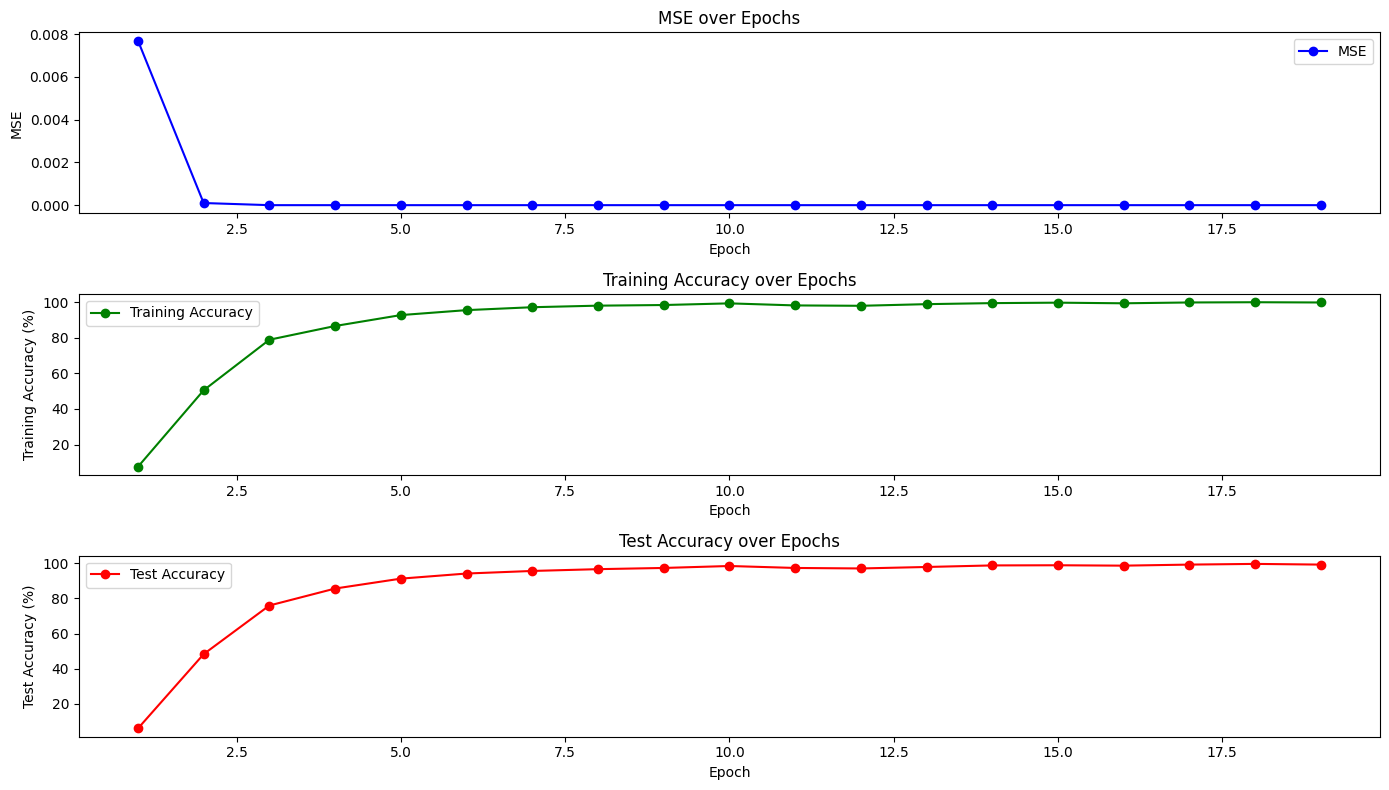

In [9]:
import os
import re
import matplotlib.pyplot as plt

# 각 에폭 폴더를 순회하며 mse와 정확도 값을 추출합니다.
base_path = "C:/Users/asx12/OneDrive/바탕 화면/인공지능/all_training_results20"
epochs = []
mse_values = []
train_accuracies = []
test_accuracies = []

for epoch_num in range(1, 21):
    epoch_folder = os.path.join(base_path, f"epoch_{epoch_num}")
    details_file = os.path.join(epoch_folder, f"epoch_{epoch_num}_details.txt")
    results_file = os.path.join(epoch_folder, f"epoch_{epoch_num}_results.txt")

    if not os.path.exists(details_file):
        print(f"경고: {details_file} 파일이 존재하지 않습니다.")
        continue

    if not os.path.exists(results_file):
        print(f"경고: {results_file} 파일이 존재하지 않습니다.")
        continue

    # details.txt에서 MSE 값 추출
    with open(details_file, 'r', encoding='utf-8') as f:
        details_content = f.read()
        mse_match = re.search(r"--- MSE \(Mean Squared Error\) ---\s*([\d.]+)", details_content)
        if mse_match:
            mse = float(mse_match.group(1))
            mse_values.append(mse)
        else:
            print(f"경고: {details_file}에서 MSE 값을 찾을 수 없습니다.")

    # results.txt에서 훈련 정확도와 테스트 정확도 추출
    with open(results_file, 'r', encoding='utf-8') as f:
        results_content = f.read()
        train_match = re.search(r"훈련 정확도:\s*([\d.]+)%", results_content)
        test_match = re.search(r"테스트 정확도:\s*([\d.]+)%", results_content)
        if train_match and test_match:
            train_accuracy = float(train_match.group(1))
            test_accuracy = float(test_match.group(1))
            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
        else:
            print(f"경고: {results_file}에서 정확도 값을 찾을 수 없습니다.")

    epochs.append(epoch_num)

# 그래프 그리기
if len(epochs) == len(mse_values) == len(train_accuracies) == len(test_accuracies):
    plt.figure(figsize=(14, 8))

    # MSE 변화 그래프
    plt.subplot(3, 1, 1)
    plt.plot(epochs, mse_values, marker='o', color='b', label='MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE over Epochs')
    plt.legend()

    # 훈련 정확도 변화 그래프
    plt.subplot(3, 1, 2)
    plt.plot(epochs, train_accuracies, marker='o', color='g', label='Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Training Accuracy (%)')
    plt.title('Training Accuracy over Epochs')
    plt.legend()

    # 테스트 정확도 변화 그래프
    plt.subplot(3, 1, 3)
    plt.plot(epochs, test_accuracies, marker='o', color='r', label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.title('Test Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("에폭, MSE, 훈련 정확도, 테스트 정확도의 데이터 개수가 일치하지 않습니다.")
